Populating the interactive namespace from numpy and matplotlib
[173, 1095, 1216, 1603, 1605, 1606, 1607, 1608, 1609, 1611, 1617, 1618, 1619, 1620, 1621, 1622, 1638, 1647, 1651, 1653, 1656, 1673, 1676, 1677, 1942, 1943, 2033, 2052, 2053, 2054, 2055, 2056, 2067, 2068, 2274, 2530, 2533, 2534, 2578, 2583, 2585, 2639, 2753, 3936, 4835, 5173, 5350, 5352, 5353, 5354, 5355, 5356, 5357, 5359, 5360, 5361, 5366, 5367, 5368, 5369, 5371, 5372, 5373, 5374, 5375, 5377, 5378, 5379, 5380, 5382, 5384, 5385, 5387, 5388, 5389, 5390, 5396, 5397, 5420, 5422, 5427, 5464, 5465, 5468, 5526, 5527, 5532, 5553, 5554, 5555, 5556, 5559, 5560, 5561, 5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571, 5572, 5615, 5637, 5638, 5639]
5641
5532


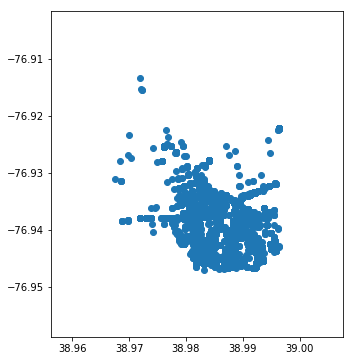

In [1]:
%pylab inline

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from matplotlib.patches import Ellipse

#DEMO:
df = pd.read_csv("crime-night.csv")
# df = pd.read_csv("crime-day.csv")

#scatter(df.latitude, df.longitude);
clong = df.longitude
clati = df.latitude
centerLati = 38.98191763
centerLong = -76.929194
milePerLati = 0.01449
milePerLong = 0.01818
outliers = []
clongList = []
clatiList = []
for i in range(0, len(df.latitude)):
    if ((clati[i] >= centerLati + milePerLati) or (clati[i] <= centerLati - milePerLati) or (clong[i] >= centerLong + milePerLong) or (clong[i] <= centerLong - milePerLong)):
#         print(i)
#         print(centerLong + milePerLong)
#         print(clong[i])
#         print(centerLong - milePerLong)

        outliers.append(i)

for i in range(0, len(df.latitude)):
    if i not in outliers:
        clatiList.append(clati[i])
        clongList.append(clong[i])

#scatter(clati, clong)
print(outliers)
print(len(df.latitude))
print(len(clatiList))
figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(clatiList, clongList)



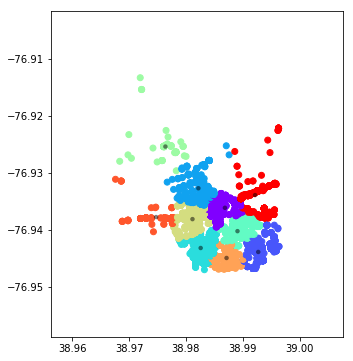

In [2]:
#K-NN Model
lati = np.array(clatiList)
long = np.array(clongList)


data = np.column_stack((lati,long))
kmeans = KMeans(init='random', n_clusters=10, n_init=100)
kmeans.fit(data)

figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(lati,long,c=kmeans.labels_,cmap=cm.rainbow);

C = kmeans.cluster_centers_
scatter(C[:,0],C[:,1],c='k',marker='o',s=20,alpha=0.5,edgecolor='none');

[ 38.98040866 -76.93050945]
[ 38.98460744 -76.94392205]
[ 38.98132458 -76.93821655]
[ 38.99160496 -76.9345981 ]
[ 38.99200035 -76.94390379]
[ 38.97297414 -76.93794167]
[ 38.98660559 -76.93582047]
[ 38.98923659 -76.94060936]
[0.0079622916913991305, 0.0047852991062031416, 0.004372901085471996, 0.0061015339339682917, 0.0043903024607351345, 0.003506401026362359, 0.0048927681086538876, 0.0046712793369757836]


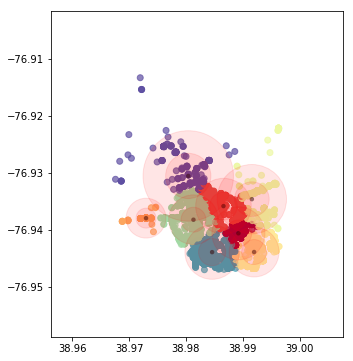

In [3]:
#Gaussian Mixtures
figure(figsize=(6,6)); ax=subplot(aspect='equal')
compoCount = 8
gmm = GaussianMixture(n_components=compoCount, covariance_type='spherical')
gmm.fit(data)
radi = []
for n in arange(0, compoCount): 
    if gmm.covariance_type == 'spherical': cov = eye(data.shape[1])*gmm.covariances_[n]
    elif gmm.covariance_type == 'full': cov = gmm.covariances_[n][:2, :2]
    elif gmm.covariance_type == 'tied': cov = gmm.covariances_[:2, :2]
    elif gmm.covariance_type == 'diag': cov = diag(gmm.covariances_[n][:2])
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(w[0,1],w[0,0])
    print(gmm.means_[n,:2])
    for i in range(1,3):
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle)
        ell.set_alpha(0.1)
        ell.set_color('red')
        ax.add_artist(ell)
        if (i == 1):
            radi.append(a[0])

C = gmm.means_
plt.scatter(lati, long, c=gmm.predict(data), alpha=0.7, cmap=cm.Spectral_r)
scatter(C[:,0],C[:,1],c='k',marker='o',s=20,alpha=0.5,edgecolor='none');
print(radi)

In [4]:
from collections import Counter
c=gmm.predict(data)
counter = Counter(c)
counter

Counter({0: 278, 1: 1138, 2: 1621, 3: 436, 4: 676, 5: 81, 6: 974, 7: 328})

In [5]:
#Prepare data
import json
CrimeCluster = []
for i in range(0, compoCount):
    CrimeCluster.append({"latitude": C[i][0], "longitude": C[i][1], "radius": radi[i] * 50, "count": counter[i], "isDay": 0})

json.dump(CrimeCluster, open("crimeSampleNight.json", "w"))